In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import PIL.Image as Image
import cv2

# Build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Os
import os
import numpy as np
import pathlib
import pandas as pd

In [2]:
data_dir = "D:/Dataset/CatnRabit/train-cat-rabbit"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Path-to-dataset/train-cat-rabbit')

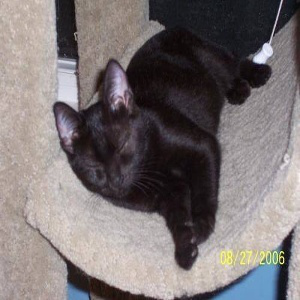

In [3]:
cats = list(data_dir.glob('cat/*'))
Image.open(str(cats[13]))

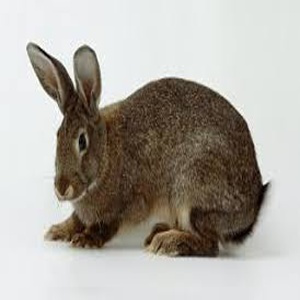

In [4]:
rabbits = list(data_dir.glob('rabbit/*'))
Image.open(str(rabbits[91]))

In [5]:
df_images = {
    'cats' : cats,
    'rabbits' : rabbits
}
df_labels = {
    'cats' : 0,
    'rabbits' : 1,
}

In [6]:
img = cv2.imread(str(df_images['rabbits'][2]))
img.shape
len(df_labels)

2

In [7]:
X, y = [], [] # X = images, y = labels

for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images
        X.append(resized_img) 
        y.append(df_labels[label])

In [8]:
X = np.array(X)
X = X/255
y = np.array(y)

In [9]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1200, 224, 224, 3)
(300, 224, 224, 3)
(1200,)
(300,)


In [11]:
img_shape = resized_img.shape
num_classes = len(df_labels)


In [12]:
def create_model(input_shape, num_classes) :
    model = Sequential([
        # First Convolution (Hidden Layer)
        Conv2D(32, (3,3), activation='relu',
               input_shape = input_shape,
               kernel_regularizer=l2(0.001),
               padding='same'),
        MaxPooling2D((2,2)),
        # Second Convolution (Hidden Layer)
        Conv2D(64, (3,3), activation='relu',
               kernel_regularizer=l2(0.001),
               padding='same'),
        MaxPooling2D((2,2)),
        # Third Convolution (Hidden Layer)
        Conv2D(64, (3,3), activation='relu',
               kernel_regularizer=l2(0.001),
               padding='same'),
        MaxPooling2D((2,2)),
        # Fourth Convolution (Hidden Layer)
        Conv2D(64, (3,3), activation='relu',
               kernel_regularizer=l2(0.001),
               padding='same'),
        MaxPooling2D((2,2)),
        # Flatten and Dense
        Flatten(),
        # First Dense with Dropout for Regularization
        Dense(64, activation='relu',
              kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        # Output Layer
        Dense(num_classes, activation = 'softmax')
    ])
    model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['acc'])
    return model

In [13]:
model = create_model(resized_img.shape, len(df_labels)) 
model.summary()

D:\Lib\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,258 (3.42 MB)

 Trainable params: 896,258 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
def train_model(X_train, y_train, X_val, y_val, img_shape, num_classes) :
    model = create_model(img_shape, num_classes)
    # Early Stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',   
        patience=10,   
        restore_best_weights=True 
    )
    # Adaptive Learning Rate
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2,     
        patience=5,   
        min_lr=0.00001
    )
    # Model Checkpointing
    model_checkpoint = ModelCheckpoint(
        'best_model.keras',  
        monitor='val_accuracy',
        save_best_only=True 
    )
    #Model Training
    history = model.fit(
        X_train, y_train, 
        epochs=50,  
        validation_data=(X_val, y_val),
        callbacks=[
            early_stopping, 
            reduce_lr,      
            model_checkpoint 
        ],
        batch_size=32  
    )
    return model
model = train_model(X_train, y_train, X_val, y_val, img_shape, num_classes)

Epoch 1/50


D:\Lib\Lib\site-packages\keras\src\backend\tensorflow\nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 418ms/step - acc: 0.5349 - loss: 0.9898 - val_acc: 0.7100 - val_loss: 0.7086 - learning_rate: 0.0010
Epoch 2/50


D:\Lib\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 387ms/step - acc: 0.7034 - loss: 0.7078 - val_acc: 0.7500 - val_loss: 0.6738 - learning_rate: 0.0010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 403ms/step - acc: 0.6847 - loss: 0.6668 - val_acc: 0.8000 - val_loss: 0.5795 - learning_rate: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 383ms/step - acc: 0.7297 - loss: 0.6249 - val_acc: 0.7700 - val_loss: 0.5210 - learning_rate: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 394ms/step - acc: 0.7939 - loss: 0.5474 - val_acc: 0.8000 - val_loss: 0.5110 - learning_rate: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 392ms/step - acc: 0.7698 - loss: 0.5499 - val_acc: 0.8200 - val_loss: 0.4705 - learning_rate: 0.0010
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 379ms/step - acc: 0.8077 - loss: 0.4931 - val_acc: 0.8600 - val_loss: 0.4161 - learning_rate: 0.0010
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 381ms/step - acc: 0.8231 - loss: 0.4492 - val_acc: 0.8100 - val_loss: 0.4913 - learning_rate: 0.0010
Epoch 9/50